In [1]:
import os

import torch as th
from transformers import BertTokenizer, BertModel

from SentimentProbe.probe.probe import *
from SentimentProbe.util.viz import *

In [2]:
default_dtype = th.float64
th.set_default_dtype(default_dtype)
device = th.device('cuda:0' if th.cuda.is_available() else 'cpu')

bert_pretrained_file = 'bert-base-uncased' # can be a path to pretrained_files or model name
tokenizer = BertTokenizer.from_pretrained(bert_pretrained_file, do_lower_case=True)
bert = BertModel.from_pretrained(bert_pretrained_file)
# we are not fine-tuning BERT
for param in bert.parameters():
    param.requires_grad = False

probe = PoincareProbe( 
    device=device, 
    default_dtype=default_dtype, 
    layer_num=10,
)
bert.to(device)
probe.to(device)
probe.load_state_dict(th.load('./SentimentProbe/checkpoint/sentiment-poincare-probe.pt', 
    map_location=device))

<All keys matched successfully>

bert is a good model
Pred: 1


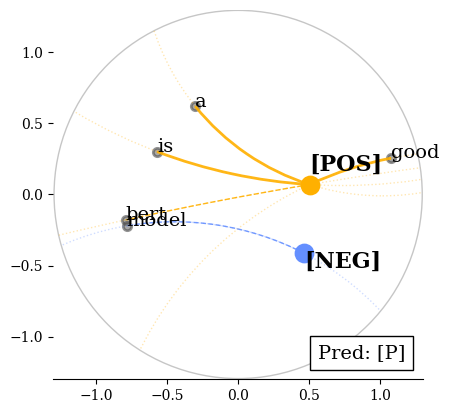

In [3]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams["font.family"] = "DejaVu Serif"
mpl.rcParams['figure.dpi'] = 100

force = True # force annotate all words
special_words = [] # list of words to annotate, overrides force
fig, ax = vizSentence("BERT is a good model", 
    probe, bert, tokenizer, force, special_words)
fig.show()

this is a good movie
Pred: 1


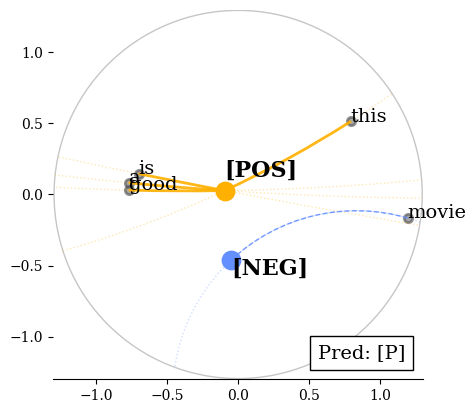

In [4]:
fig, ax = vizSentence("This is a good movie", 
    probe, bert, tokenizer, force, special_words)
fig.show()

this is not a good movie
Pred: 0


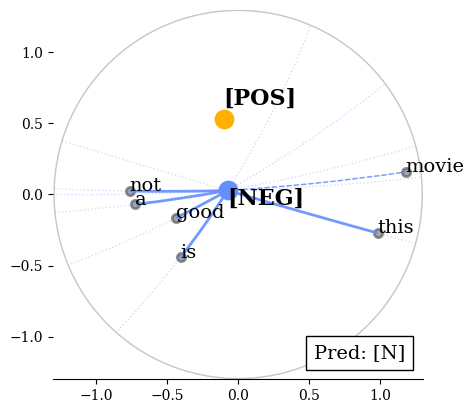

In [5]:
fig, ax = vizSentence("This is not a good movie", 
    probe, bert, tokenizer, force, special_words)
fig.show()